# Problem Statement
**Predicting Customer Loyalty:**

How can we predict whether a customer will choose to travel with us again based on their previous experiences and satisfaction levels?

In [3]:
# import all necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import the dataset
df = pd.read_excel(r"C:\Users\user\Cruise lines\CastAway Cruise Lines Data.xlsx")
df

,Total Cost,Room Costs,Ship BoardExpenses,Casino Expenses,Excursion Expenses,Room Type,Customer Satisfaction Average of All Questions,Overall Trip 1-5 Satisfaction,Would you travel with us again?
0,2513.1275,910.9364,912.3840,405.5781,284.2290,Balcony,5.0,5,Yes
1,2417.3518,742.8454,857.6568,476.8440,340.0056,Balcony,3.1,3,Yes
2,2315.6382,747.2586,816.7500,507.6540,243.9756,Balcony,5.0,5,Yes
3,2291.4427,889.0651,790.8714,493.1022,118.4040,Balcony,4.5,5,Yes
4,2244.2013,753.8784,749.4795,485.4234,255.4200,Balcony,5.0,5,Yes
...,...,...,...,...,...,...,...,...,...
1045,516.8057,488.7960,45.4608,-71.1711,53.7200,Window,1.9,2,No
1046,482.0293,433.1452,168.4980,-146.3949,26.7810,Window,2.3,2,No
1047,412.7553,528.5239,53.9550,-187.5776,17.8540,Window,2.9,3,No
1048,379.7558,404.8966,148.9752,-219.7780,45.6620,Window,3.7,4,No


## Dictionary of the Dataset
**Column Name	Description**
1. **Total Cost**	The total cost incurred by the customer for the trip.
2. **Room Costs**	The cost associated with the room booked by the customer.
3. **Ship Board Expenses**	Expenses incurred on board the ship (e.g., dining, activities).
4. **Casino Expenses**	Expenses related to casino activities during the trip.
5. **Excursion Expenses**	Costs associated with excursions taken during the trip.
6. **Room Type**	The type of room booked (e.g., Balcony, Interior, Suite).
7. **Customer Satisfaction Average of All Questions**	Average score of customer satisfaction across all questions asked.
8. **Overall Trip 1-5 Satisfaction**	Overall satisfaction rating of the trip on a scale of 1 to 5.
9. **Would you travel with us again?**	A binary response indicating whether the customer would choose to travel with the cruise line again.

In [6]:
# shape
df.shape

(1050, 9)

In [7]:
# check for missing values
df.isnull().sum()

Total Cost                                        0
Room Costs                                        0
Ship BoardExpenses                                0
Casino Expenses                                   0
Excursion Expenses                                0
Room Type                                         0
Customer Satisfaction Average of All Questions    0
Overall Trip 1-5 Satisfaction                     0
Would you travel with us again?                   0
dtype: int64

In [8]:
# check for data types
df.dtypes

Total Cost                                        float64
Room Costs                                        float64
Ship BoardExpenses                                float64
Casino Expenses                                   float64
Excursion Expenses                                float64
Room Type                                          object
Customer Satisfaction Average of All Questions    float64
Overall Trip 1-5 Satisfaction                       int64
Would you travel with us again?                    object
dtype: object

In [9]:
# renaming of columns
# Renaming columns
df.rename(columns={'Ship BoardExpenses': 'ShipBoard Expenses', 
                   'Customer Satisfaction Average of All Questions': 'Average Customer Satisfaction', 
                   'Overall Trip 1-5 Satisfaction': 'Overall Trip Satisfaction',
                  'Would you travel with us again?': 'TravelAgain'}, inplace=True)

print(df)

      Total Cost  Room Costs  Ship BoardExpenses   Casino Expenses  \
0      2513.1275    910.9364             912.3840         405.5781   
1      2417.3518    742.8454             857.6568         476.8440   
2      2315.6382    747.2586             816.7500         507.6540   
3      2291.4427    889.0651             790.8714         493.1022   
4      2244.2013    753.8784             749.4795         485.4234   
...          ...         ...                  ...              ...   
1045    516.8057    488.7960              45.4608         -71.1711   
1046    482.0293    433.1452             168.4980        -146.3949   
1047    412.7553    528.5239              53.9550        -187.5776   
1048    379.7558    404.8966             148.9752        -219.7780   
1049    306.0668    406.2720              57.2418        -186.3215   

      Excursion Expenses Room Type  Average Customer Satisfaction  \
0               284.2290   Balcony                            5.0   
1               340.0

In [10]:
# summary statistics
df.describe().astype('int')

,Total Cost,Room Costs,Ship BoardExpenses,Casino Expenses,Excursion Expenses,Average Customer Satisfaction,Overall Trip Satisfaction
count,1050,1050,1050,1050,1050,1050,1050
mean,1127,528,388,130,149,3,3
std,374,235,227,211,94,1,1
min,306,271,1,-286,0,0,1
25%,868,351,196,-52,71,2,2
50%,1073,486,381,110,143,3,3
75%,1322,616,583,307,219,4,5
max,2823,1559,958,779,407,5,5


## Data Preprocessing and Validation

In [12]:
# Remove whitespace from column headers
df.columns = df.columns.str.strip()

# Display the updated DataFrame
df.head()

,Total Cost,Room Costs,Ship BoardExpenses,Casino Expenses,Excursion Expenses,Room Type,Average Customer Satisfaction,Overall Trip Satisfaction,TravelAgain
0,2513.1275,910.9364,912.3840,405.5781,284.2290,Balcony,5.0,5,Yes
1,2417.3518,742.8454,857.6568,476.8440,340.0056,Balcony,3.1,3,Yes
2,2315.6382,747.2586,816.7500,507.6540,243.9756,Balcony,5.0,5,Yes
3,2291.4427,889.0651,790.8714,493.1022,118.4040,Balcony,4.5,5,Yes
4,2244.2013,753.8784,749.4795,485.4234,255.4200,Balcony,5.0,5,Yes


In [13]:
# fetch the categorical variable
cat_vars = df.select_dtypes(include = ['object', 'category']).columns.to_list()
cat_vars

['Room Type', 'TravelAgain']

In [14]:
# fetch the numerical variable
num_vars = df.select_dtypes(include = ['number']).columns.to_list()
num_vars

['Total Cost',
 'Room Costs',
 'Ship BoardExpenses',
 'Casino Expenses',
 'Excursion Expenses',
 'Average Customer Satisfaction',
 'Overall Trip Satisfaction']

In [15]:
# value count of categorical variables
for count in cat_vars:
    print(df[count].value_counts())

Room Type
Interior    450
Window      300
Balcony     240
Suite        60
Name: count, dtype: int64
TravelAgain
Yes    532
No     518
Name: count, dtype: int64


In [16]:
# value count of numerical variables
for count in num_vars:
    print(df[count].value_counts())

Total Cost
1476.6400    2
1280.6200    2
1152.9100    2
1290.5200    2
1665.9800    2
            ..
1132.2600    1
1129.7400    1
1125.7200    1
1125.7100    1
306.0668     1
Name: count, Length: 1044, dtype: int64
Room Costs
335.1600    19
410.9700    18
303.2400    18
343.1400    17
399.0000    17
            ..
783.6675     1
610.6441     1
701.3743     1
551.6500     1
406.2720     1
Name: count, Length: 383, dtype: int64
Ship BoardExpenses
458.3700    5
187.1100    4
484.1100    4
167.3100    4
46.5300     4
           ..
705.8700    1
737.5500    1
488.0700    1
696.9600    1
57.2418     1
Name: count, Length: 764, dtype: int64
Casino Expenses
-126.2600    5
 205.3200    4
 213.5800    4
-102.6600    4
 0.0000      4
            ..
 101.4800    1
 304.4400    1
-15.3400     1
-35.9900     1
-186.3215    1
Name: count, Length: 907, dtype: int64
Excursion Expenses
84.5300     6
47.4000     5
106.6500    5
285.9800    5
82.9500     5
           ..
190.0800    1
158.1228    1
87.991

In [17]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Identify columns with negative values
negative_columns = numeric_df.columns[(numeric_df < 0).any()]

# Fetch the columns with negative values
negative_values_df = numeric_df[negative_columns]

print("Columns with negative values:")
print(negative_values_df)

Columns with negative values:
      Casino Expenses
0            405.5781
1            476.8440
2            507.6540
3            493.1022
4            485.4234
...               ...
1045         -71.1711
1046        -146.3949
1047        -187.5776
1048        -219.7780
1049        -186.3215

[1050 rows x 1 columns]


In [18]:
# Calculate the mean (excluding negative values)
mean_value = df['Casino Expenses'][df['Casino Expenses'] >= 0].mean()

# Impute negative values with the mean
df['Casino Expenses'] = df['Casino Expenses'].apply(lambda x: mean_value if x < 0 else x)
print(df)

      Total Cost  Room Costs  Ship BoardExpenses  Casino Expenses  \
0      2513.1275    910.9364            912.3840       405.578100   
1      2417.3518    742.8454            857.6568       476.844000   
2      2315.6382    747.2586            816.7500       507.654000   
3      2291.4427    889.0651            790.8714       493.102200   
4      2244.2013    753.8784            749.4795       485.423400   
...          ...         ...                 ...              ...   
1045    516.8057    488.7960             45.4608       247.050924   
1046    482.0293    433.1452            168.4980       247.050924   
1047    412.7553    528.5239             53.9550       247.050924   
1048    379.7558    404.8966            148.9752       247.050924   
1049    306.0668    406.2720             57.2418       247.050924   

      Excursion Expenses Room Type  Average Customer Satisfaction  \
0               284.2290   Balcony                            5.0   
1               340.0056   Balcon

In [19]:
# summary statistics
df.describe()

,Total Cost,Room Costs,Ship BoardExpenses,Casino Expenses,Excursion Expenses,Average Customer Satisfaction,Overall Trip Satisfaction
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,1127.041196,528.122936,388.822679,247.050924,149.626436,3.438381,3.469524
std,374.444832,235.103509,227.660449,126.463253,94.774713,1.220786,1.247887
min,306.066800,271.320000,1.980000,0.000000,0.000000,0.500000,1.000000
25%,868.885000,351.120000,196.020000,177.354500,71.234300,2.400000,2.000000
50%,1073.940000,486.680000,381.645000,247.050924,143.843200,3.400000,3.000000
75%,1322.461875,616.179200,583.961400,307.370000,219.809600,4.700000,5.000000
max,2823.501600,1559.446000,958.320000,779.733900,407.622600,5.000000,5.000000


## Statistical Analysis

**Hypothesis**

H0: Total trip costs do influence customers' decision to travel again

H1: The total cost of the trip does not influence customers' decision to travel again.

### Hypothesis Testing
To conduct hypothesis testing for the relationship between total trip costs (a numerical variable) and the decision to travel again (a categorical variable), you can use an appropriate statistical test. Given the nature of your data, a suitable method would be the t-test for independent samples if you have two categories in "TravelAgain" (e.g., Yes and No). If there are more than two categories, you might consider using ANOVA.

#### Hypothesis Testing Process
**Define Hypotheses:**

- `Null Hypothesis (H0): Total trip costs do influence customers' decision to travel again.`
- `Alternative Hypothesis (H1): The total cost of the trip does not influence customers' decision to travel again.`

**Select the Significance Level:** Commonly used significance levels is `0.05`.

**Choose the Appropriate Test:**

If "TravelAgain" has two categories (e.g., Yes/No), use a t-test.

If "TravelAgain" has more than two categories, use ANOVA.

**Perform the Test:**

Calculate the test statistic and p-value.

**Make a Decision:**

If the p-value is less than the significance level, reject the null hypothesis.
If the p-value is greater than the significance level, do not reject the null hypothesis.

In [22]:
from scipy import stats

# Split the data based on 'TravelAgain'
group_yes = df[df['TravelAgain'] == 'Yes']['Total Cost']
group_no = df[df['TravelAgain'] == 'No']['Total Cost']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(group_yes, group_no)

# Print the results
print(f'T-test statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Total trip costs do influence customers' decision to travel again.")
else:
    print("Do not reject the null hypothesis: The total cost of the trip does not influence customers' decision to travel again.")


T-test statistic: 8.967186118393796
P-value: 1.369483164561143e-18
Reject the null hypothesis: Total trip costs do influence customers' decision to travel again.


## Exploratory Data Analysis
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

### Univariate Analysis

In [25]:
df.columns

Index(['Total Cost', 'Room Costs', 'Ship BoardExpenses', 'Casino Expenses',
       'Excursion Expenses', 'Room Type', 'Average Customer Satisfaction',
       'Overall Trip Satisfaction', 'TravelAgain'],
      dtype='object')

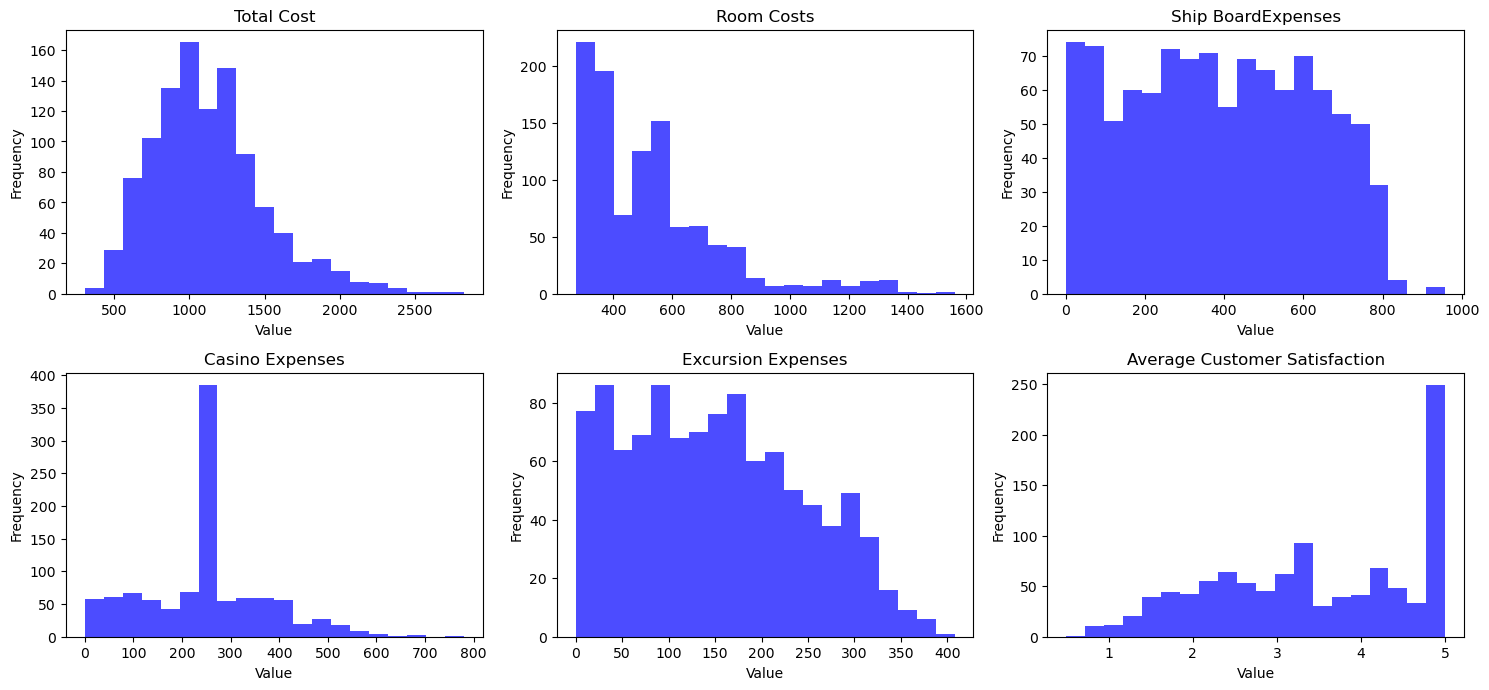

In [26]:
# Define the columns for which to create histograms
columns_to_plot = ['Total Cost', 'Room Costs', 'Ship BoardExpenses', 'Casino Expenses',
       'Excursion Expenses', 'Average Customer Satisfaction']

# Set up the plot
plt.figure(figsize=(15, 10))

# Create histograms for each column
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(3, 3, i)  # Adjust the grid size accordingly
    plt.hist(df[column], bins=20, color='blue', alpha=0.7)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

## Bivariate Analysis

In [28]:
# Room type by Total cost
room_type_cost = df.groupby('Room Type')['Total Cost'].sum().sort_values(ascending = False).round(2)
room_type_cost

Room Type
Interior    428786.95
Balcony     326819.40
Window      318644.81
Suite       109142.09
Name: Total Cost, dtype: float64

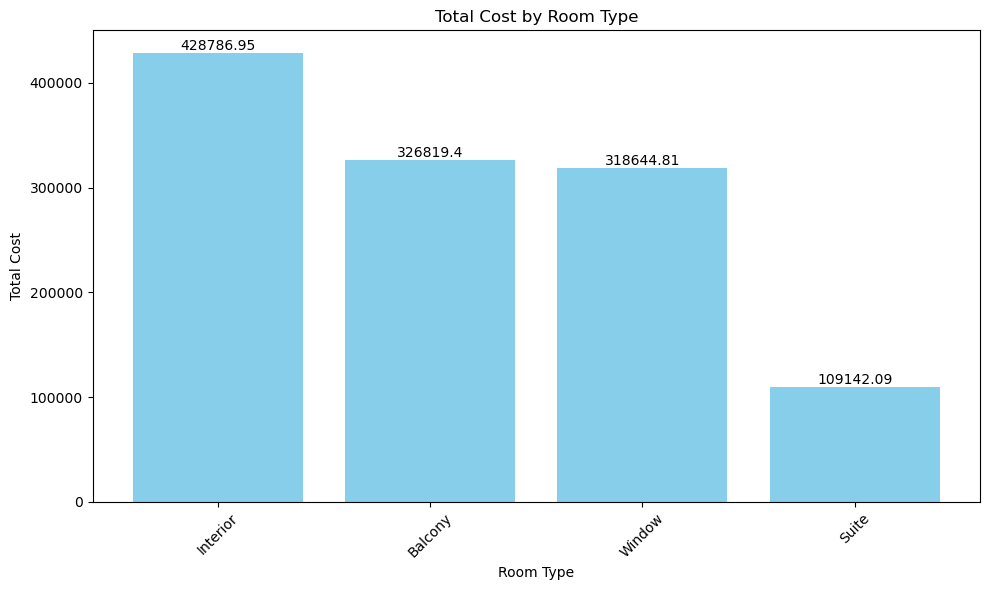

In [29]:
# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(room_type_cost.index, room_type_cost.values, color='skyblue')

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Customize the chart
plt.title('Total Cost by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Total Cost')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [30]:
# Total cost and Travel Again
total_cost_travel_again = df.groupby('TravelAgain')['Total Cost'].sum().round(2)
total_cost_travel_again

TravelAgain
No     531359.90
Yes    652033.35
Name: Total Cost, dtype: float64

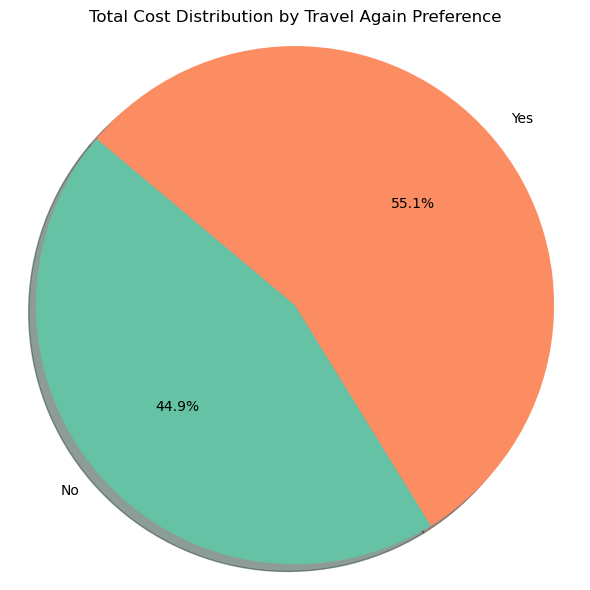

In [31]:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(total_cost_travel_again, 
        labels=total_cost_travel_again.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#66c2a5', '#fc8d62'], # Customize colors if needed
        shadow=True)

# Customize the chart
plt.title('Total Cost Distribution by Travel Again Preference')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.tight_layout()
plt.show()

In [32]:
# customer overall satisfaction vs travel again
overall_satisfaction_travel_again = df.groupby('TravelAgain')['Overall Trip Satisfaction'].value_counts().unstack()
overall_satisfaction_travel_again

Overall Trip Satisfaction,1,2,3,4,5
TravelAgain,,,,,
No,56.0,206.0,238.0,17.0,1.0
Yes,NaN,4.0,39.0,182.0,307.0


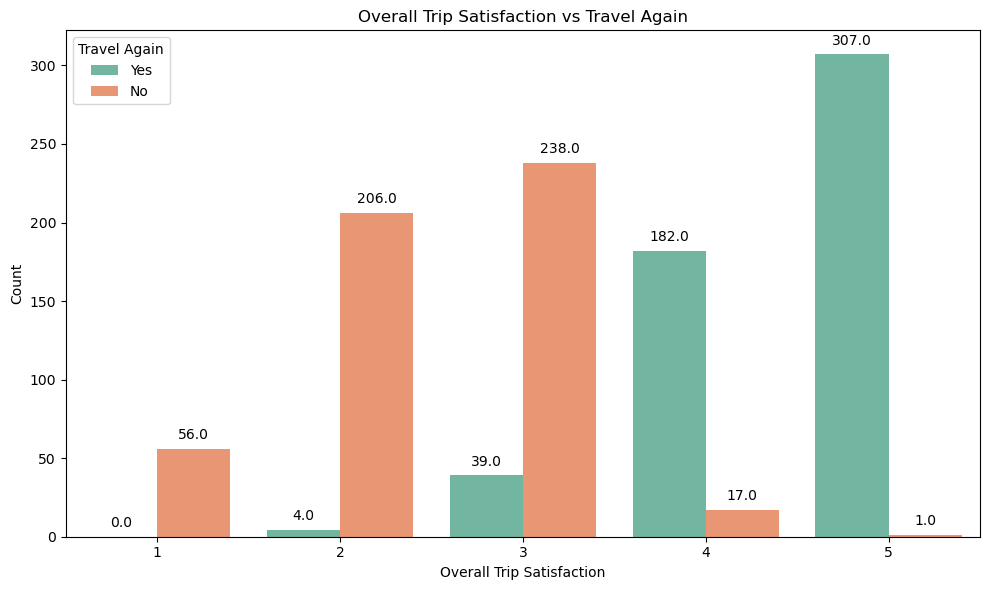

In [33]:
# Create a countplot
plt.figure(figsize=(10, 6))
count_plot = sns.countplot(data=df, x='Overall Trip Satisfaction', hue='TravelAgain', palette='Set2')

# Add data labels on top of the bars
for p in count_plot.patches:
    count_plot.annotate(f'{p.get_height()}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', 
                        fontsize=10, color='black', 
                        xytext=(0, 5), 
                        textcoords='offset points')

# Customize the chart
plt.title('Overall Trip Satisfaction vs Travel Again')
plt.xlabel('Overall Trip Satisfaction')
plt.ylabel('Count')
plt.legend(title='Travel Again', loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

## Multivariate Analysis

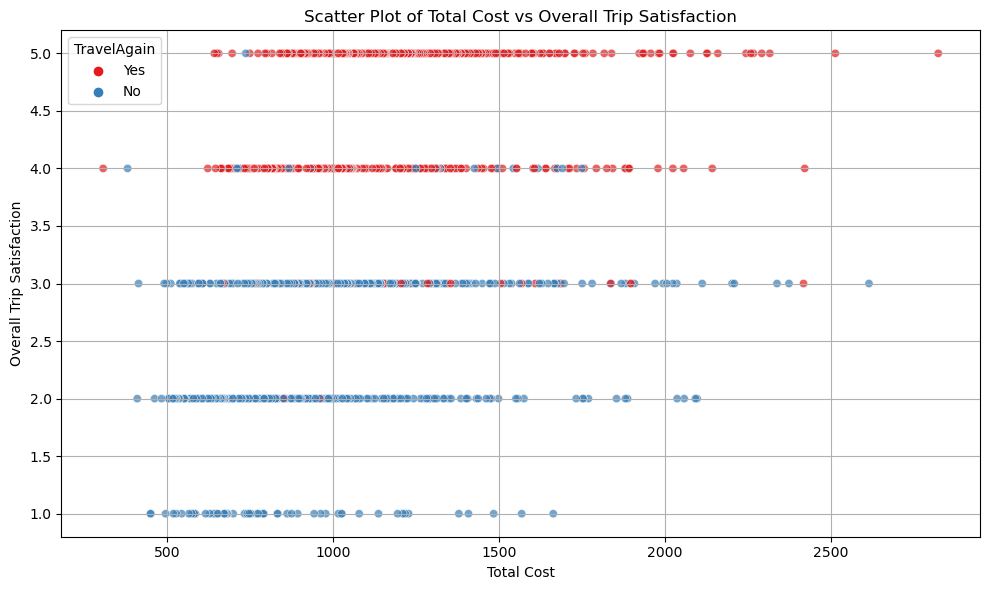

In [35]:
# Scatter plot distribution of total cost, Travel Again, and Overall Trip Satisfaction
# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=df, x='Total Cost', y='Overall Trip Satisfaction', hue='TravelAgain', palette='Set1', alpha=0.7)

# Customize the plot
plt.title('Scatter Plot of Total Cost vs Overall Trip Satisfaction')
plt.xlabel('Total Cost')
plt.ylabel('Overall Trip Satisfaction')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

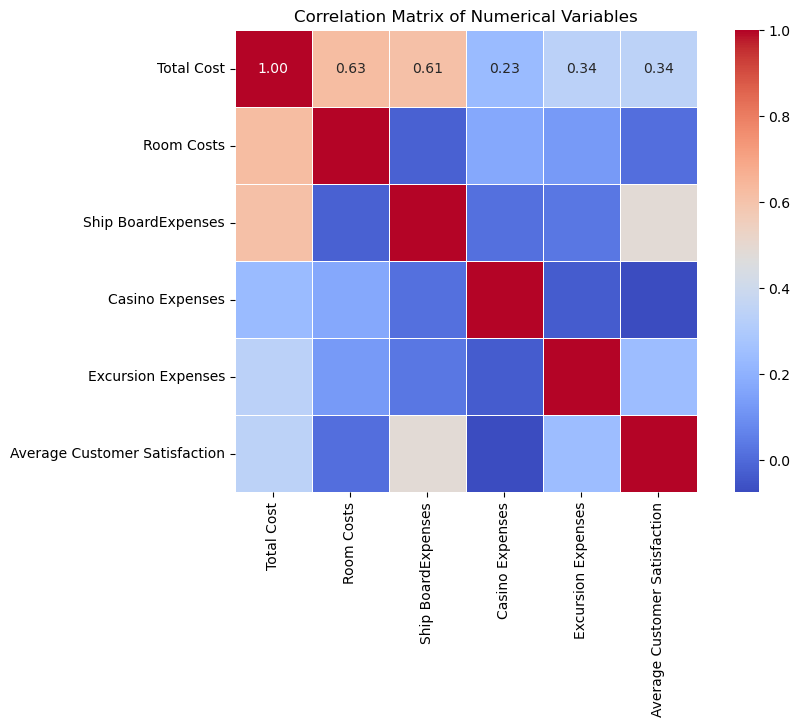

In [36]:
# correlation matrix of the numerical variables
columns_to_plot = ['Total Cost', 'Room Costs', 'Ship BoardExpenses', 'Casino Expenses',
       'Excursion Expenses', 'Average Customer Satisfaction']
correlation_matrix = df[columns_to_plot].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)

# Customize the plot
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

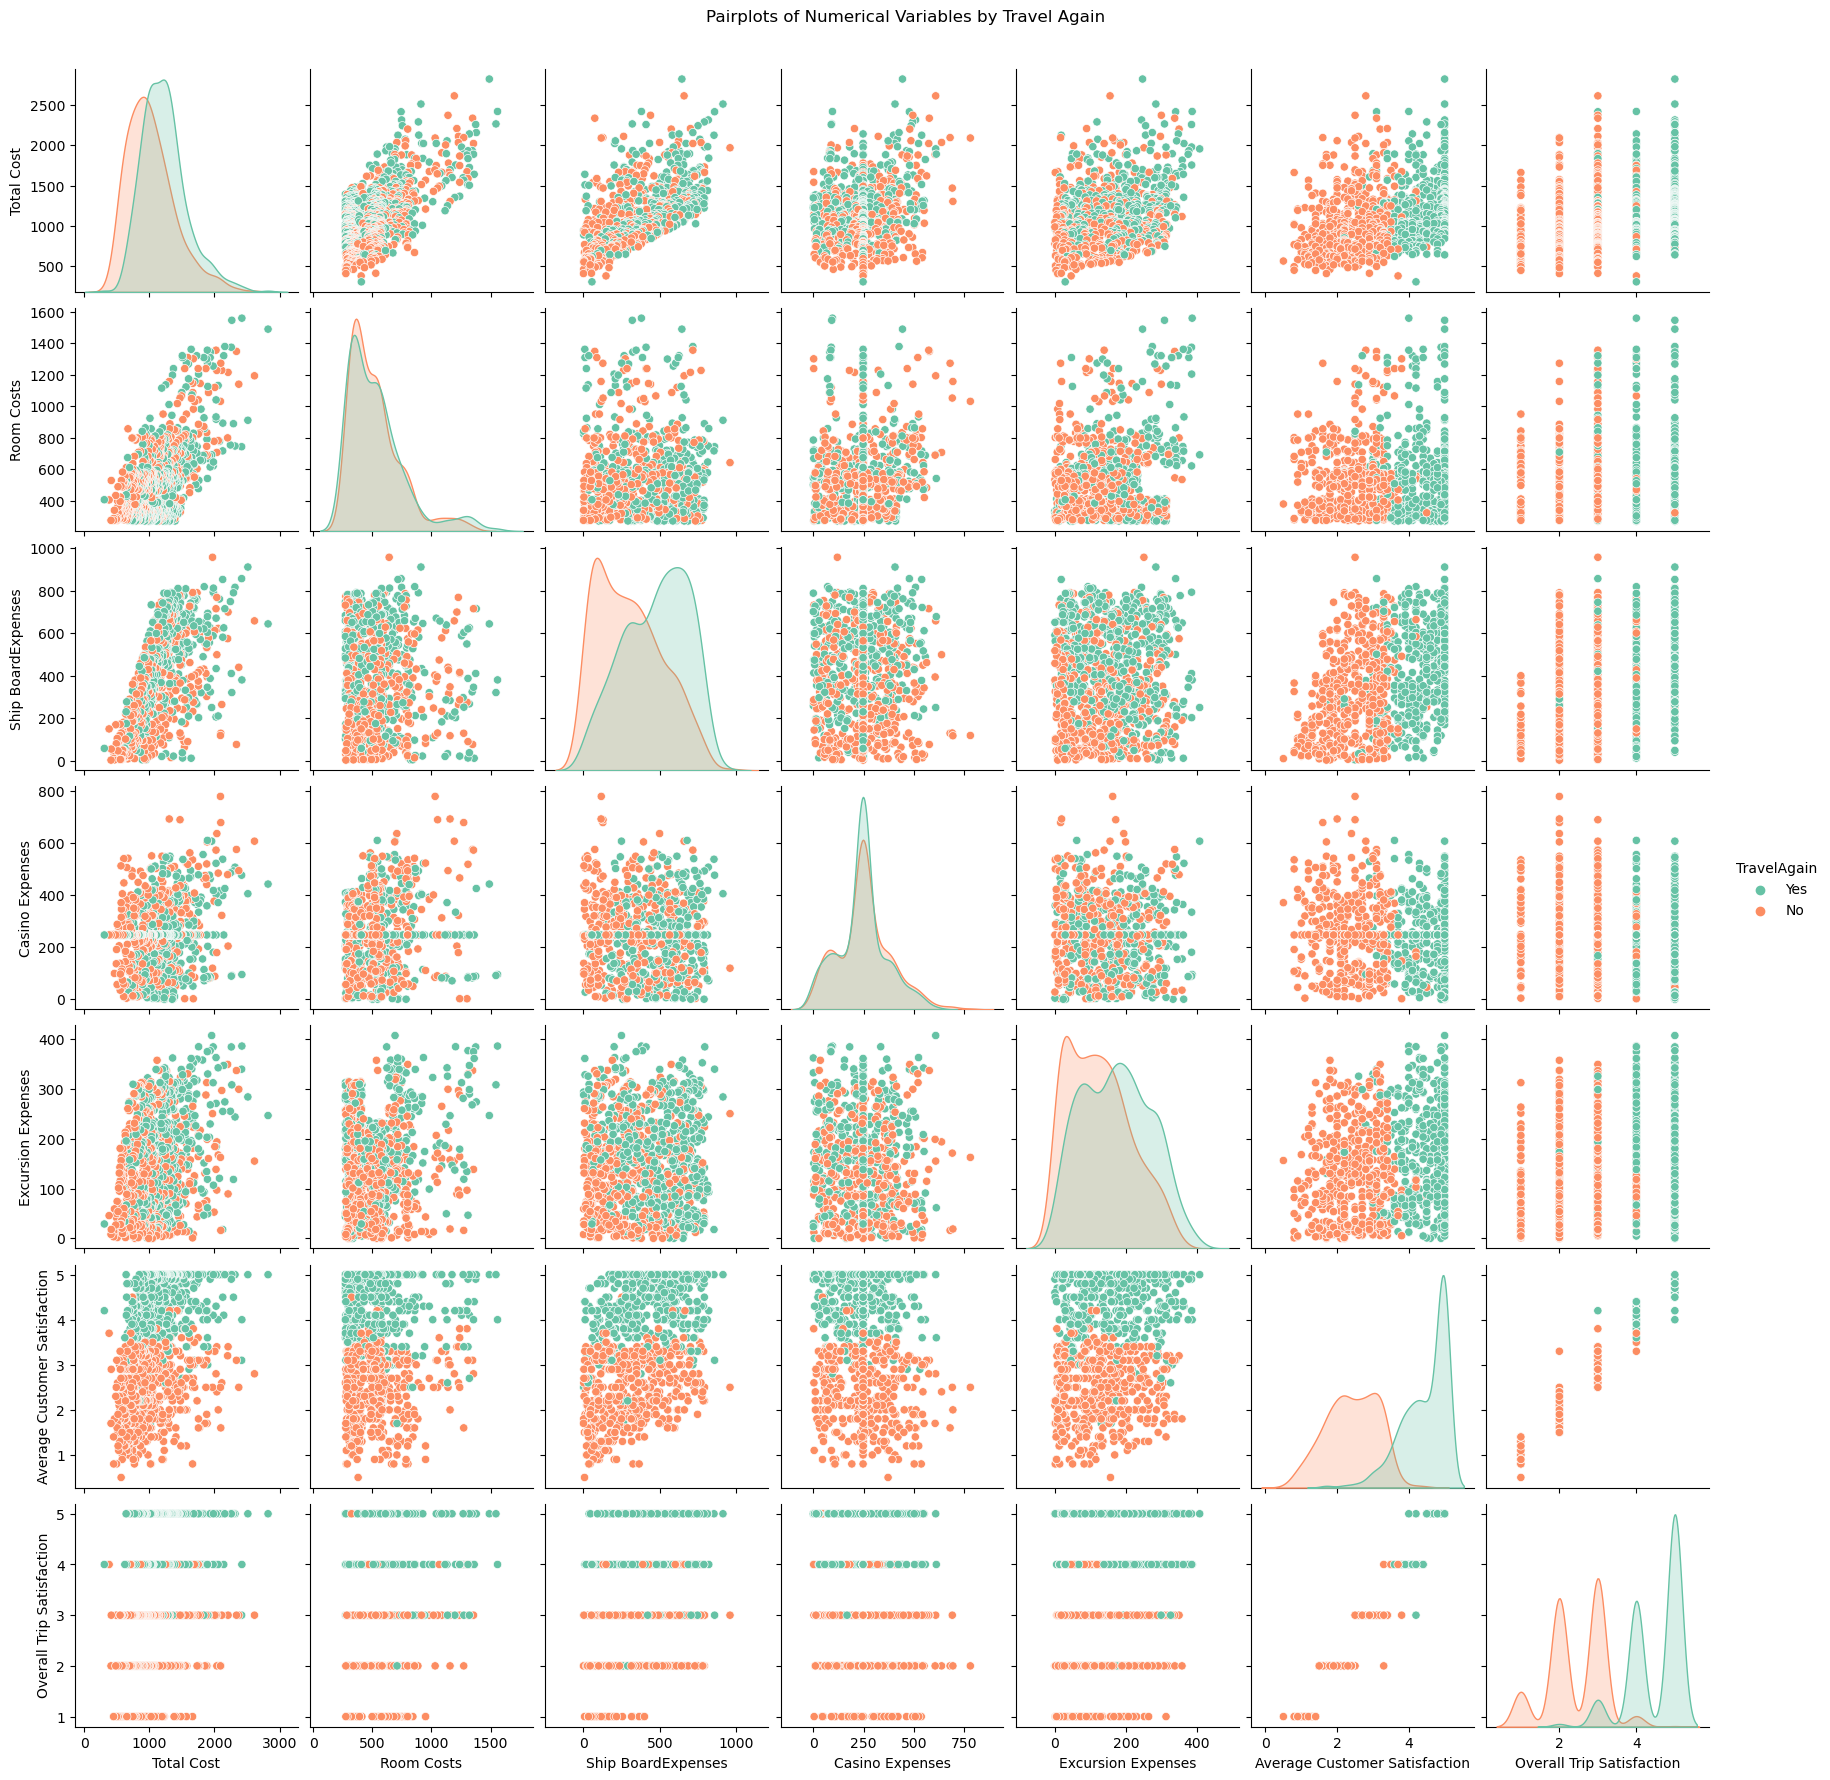

In [37]:
# pairplots of numerical variables
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")
# Create pairplots
sns.pairplot(df, hue='TravelAgain', diag_kind='kde', palette='Set2')

# Customize and show the plot
plt.suptitle('Pairplots of Numerical Variables by Travel Again', y=1.02)
plt.show()

## Converting Categorical into Numerical Data
- Using the label encoder


In [39]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode 'TravelAgain' column
df['TravelAgain'] = label_encoder.fit_transform(df['TravelAgain'])

# Encode 'Room Type' column
df['Room Type'] = label_encoder.fit_transform(df['Room Type'])

# Display the updated DataFrame
print(df.head())

   Total Cost  Room Costs  Ship BoardExpenses  Casino Expenses  \
0   2513.1275    910.9364            912.3840         405.5781   
1   2417.3518    742.8454            857.6568         476.8440   
2   2315.6382    747.2586            816.7500         507.6540   
3   2291.4427    889.0651            790.8714         493.1022   
4   2244.2013    753.8784            749.4795         485.4234   

   Excursion Expenses  Room Type  Average Customer Satisfaction  \
0            284.2290          0                            5.0   
1            340.0056          0                            3.1   
2            243.9756          0                            5.0   
3            118.4040          0                            4.5   
4            255.4200          0                            5.0   

   Overall Trip Satisfaction  TravelAgain  
0                          5            1  
1                          3            1  
2                          5            1  
3                       

## Feature Selection

In [41]:
# independent variables
X = df.drop('TravelAgain', axis = 1)

In [42]:
# see few rows
X.head()

,Total Cost,Room Costs,Ship BoardExpenses,Casino Expenses,Excursion Expenses,Room Type,Average Customer Satisfaction,Overall Trip Satisfaction
0,2513.1275,910.9364,912.3840,405.5781,284.2290,0,5.0,5
1,2417.3518,742.8454,857.6568,476.8440,340.0056,0,3.1,3
2,2315.6382,747.2586,816.7500,507.6540,243.9756,0,5.0,5
3,2291.4427,889.0651,790.8714,493.1022,118.4040,0,4.5,5
4,2244.2013,753.8784,749.4795,485.4234,255.4200,0,5.0,5


In [43]:
# dependent variable y
y = df['TravelAgain']

# check few rows
y.head()

0    1
1    1
2    1
3    1
4    1
Name: TravelAgain, dtype: int32

In [44]:
y.value_counts()

TravelAgain
1    532
0    518
Name: count, dtype: int64

## Train Test Split

In [46]:
# import scikit libraries
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Scaling of Data

In [48]:
from sklearn.preprocessing import MinMaxScaler
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training features
scaler.fit(X_train)

# Transform the training and test features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Selection:
1. Logistic Regression
2. Random Forest
3. Support Vector


In [50]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression
lr = LogisticRegression()

# Fit the model on training set (replace X_train_scaled with your feature set)
lr.fit(X_train_scaled, y_train)  # Change X_test_scaled to X_train_scaled
lr_probs = lr.predict_proba(X_test_scaled)[:, 1]

# Create predictions
y_pred = lr.predict(X_test_scaled)

# Print the accuracy of the logistic regression model
print(f'The accuracy score of the LR is {accuracy_score(y_test, y_pred):.2f}')  


The accuracy score of the LR is 0.95


In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score

def metrics_calculator(y_true, y_pred, model_name):
  '''To calculate and return a dictionary of performance metrics'''

  # calculate performance metrics
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)

  # create a dictionary of results
  results = {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1_Score': f1}

  return results

In [52]:
# Assuming metrics_calculator returns a dictionary
lr_result = metrics_calculator(y_test, y_pred, 'lr')
print(f"{lr_result}")

{'Model': 'lr', 'Accuracy': 0.9523809523809523, 'Precision': 0.9570552147239264, 'Recall': 0.9512195121951219, 'F1_Score': 0.9541284403669725}


In [53]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize Random Forest
rf = RandomForestClassifier()

# Fit the model on the training set (replace X_train_scaled with your feature set)
rf.fit(X_train_scaled, y_train)
rf_probs = rf.predict_proba(X_test_scaled)[:,1]

# Create predictions
y_pred = rf.predict(X_test_scaled)

# Print the accuracy of the Random Forest model
print(f'The accuracy score of the RF is {accuracy_score(y_test, y_pred):.2f}')


The accuracy score of the RF is 0.97


In [54]:
# Assuming metrics_calculator returns a dictionary
rf_result = metrics_calculator(y_test, y_pred, 'rf')
print(f"{rf_result}")

{'Model': 'rf', 'Accuracy': 0.9682539682539683, 'Precision': 0.9695121951219512, 'Recall': 0.9695121951219512, 'F1_Score': 0.9695121951219512}


In [55]:
# Support Vector Machine
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize Support Vector Machine
svm = SVC(probability=True)  # Set probability=True if you want to use predict_proba

# Fit the model on the training set (replace X_train_scaled with your feature set)
svm.fit(X_train_scaled, y_train)
svm_probs = svm.predict_proba(X_test_scaled)[:,1]

# Create predictions
y_pred = svm.predict(X_test_scaled)

# Print the accuracy of the Support Vector Machine model
print(f'The accuracy score of the SVM is {accuracy_score(y_test, y_pred):.2f}')


The accuracy score of the SVM is 0.96


In [56]:
# Assuming metrics_calculator returns a dictionary
svm_result = metrics_calculator(y_test, y_pred, 'svm')
print(f"{svm_result}")

{'Model': 'svm', 'Accuracy': 0.9587301587301588, 'Precision': 0.9575757575757575, 'Recall': 0.9634146341463414, 'F1_Score': 0.9604863221884499}


LOGISTIC REGRESSION Classification Report:
                  precision    recall  f1-score   support

    Travel Again       0.95      0.95      0.95       151
Not Travel Again       0.96      0.95      0.95       164

        accuracy                           0.95       315
       macro avg       0.95      0.95      0.95       315
    weighted avg       0.95      0.95      0.95       315



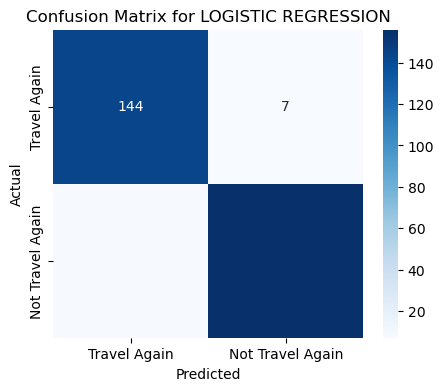

RANDOM FOREST Classification Report:
                  precision    recall  f1-score   support

    Travel Again       0.97      0.97      0.97       151
Not Travel Again       0.97      0.97      0.97       164

        accuracy                           0.97       315
       macro avg       0.97      0.97      0.97       315
    weighted avg       0.97      0.97      0.97       315



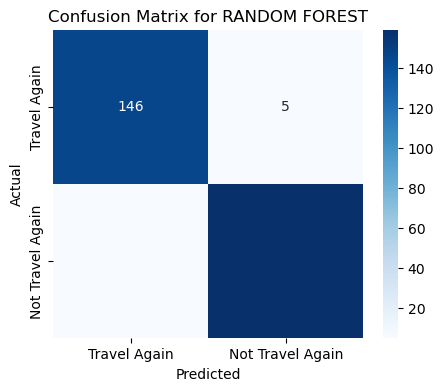

SUPPORT VECTOR MACHINE Classification Report:
                  precision    recall  f1-score   support

    Travel Again       0.96      0.95      0.96       151
Not Travel Again       0.96      0.96      0.96       164

        accuracy                           0.96       315
       macro avg       0.96      0.96      0.96       315
    weighted avg       0.96      0.96      0.96       315



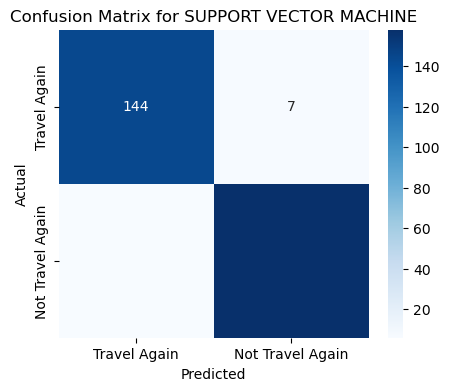

In [57]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, classification_report

# Create a list of model names
model_names = ['LOGISTIC REGRESSION', 'RANDOM FOREST', 'SUPPORT VECTOR MACHINE']
models = [lr, rf, svm]  # Ensure you have initialized lr, rf, and svm models

# Set the labels for the confusion matrix
labels = ['Travel Again', 'Not Travel Again']

# Loop through each model and generate a classification report and confusion matrix
for i, model in enumerate(models):
    # Predict the classes of the testing data
    y_pred = model.predict(X_test_scaled)

    # Generate the classification report
    report = classification_report(y_test, y_pred, target_names=labels)
    print(f'{model_names[i]} Classification Report:\n{report}')

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_names[i]}')
    plt.show()


In [58]:
# Concatenate results into a single dataframe for all the model metric calculator results
result_df = pd.DataFrame([lr_result, svm_result, rf_result])
result_df

,Model,Accuracy,Precision,Recall,F1_Score
0,lr,0.952381,0.957055,0.951220,0.954128
1,svm,0.958730,0.957576,0.963415,0.960486
2,rf,0.968254,0.969512,0.969512,0.969512


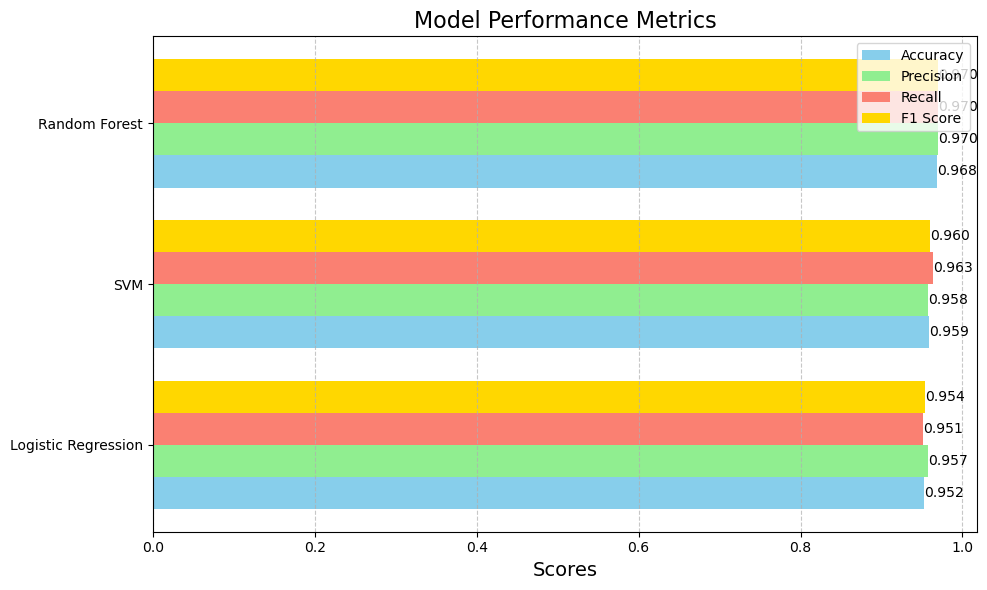

In [59]:
# Data
models = ['Logistic Regression', 'SVM', 'Random Forest']
accuracy = [0.952381, 0.958730, 0.968254]
precision = [0.957055, 0.957576, 0.969512]
recall = [0.951220, 0.963415, 0.969512]
f1_score = [0.954128, 0.960486, 0.969512]

# Set up the bar positions
bar_width = 0.2
x = np.arange(len(models))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for each metric
bars1 = ax.barh(x - bar_width * 1.5, accuracy, bar_width, label='Accuracy', color='skyblue')
bars2 = ax.barh(x - bar_width / 2, precision, bar_width, label='Precision', color='lightgreen')
bars3 = ax.barh(x + bar_width / 2, recall, bar_width, label='Recall', color='salmon')
bars4 = ax.barh(x + bar_width * 1.5, f1_score, bar_width, label='F1 Score', color='gold')

# Add data labels
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.3f}', 
                va='center', ha='left', fontsize=10)

# Customize the plot
ax.set_xlabel('Scores', fontsize=14)
ax.set_title('Model Performance Metrics', fontsize=16)
ax.set_yticks(x)
ax.set_yticklabels(models)
ax.legend()
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [60]:
from sklearn.metrics import roc_auc_score
# Assuming lr_probs, svm_probs, and rf_probs are already defined as the predicted probabilities
# Calculate the AUC-ROC for logistic regression
lr_auc = roc_auc_score(y_test, lr_probs)

# Calculate the AUC-ROC for decision tree (assuming you meant SVM here)
svm_auc = roc_auc_score(y_test, svm_probs)

# Calculate the AUC-ROC for random forest
rf_auc = roc_auc_score(y_test, rf_probs)

# Print the AUC-ROC Scores for each model
print(f'LR AUC-ROC: {lr_auc:.4f}')
print(f'SVM AUC-ROC: {svm_auc:.4f}')
print(f'RF AUC-ROC: {rf_auc:.4f}')


LR AUC-ROC: 0.9824
SVM AUC-ROC: 0.9791
RF AUC-ROC: 0.9872


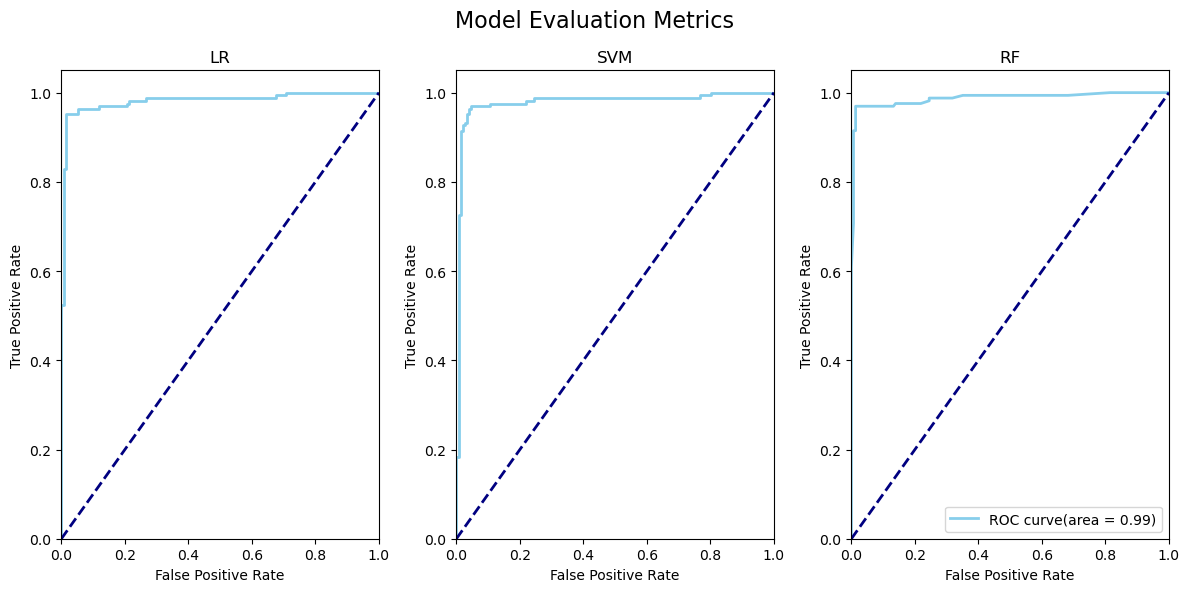

In [61]:
from sklearn.metrics import roc_curve, auc

# Data for plotting
models = [lr, svm, rf]
model_names = ['LR', 'SVM', 'RF']

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs = axs.flatten()

# Plot AUC-ROC Curves and Scores for each model
for i, (model, name) in enumerate(zip(models, model_names)):
  fpr, tpr, _= roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
  roc_auc = auc(fpr, tpr)

  # Plot ROC Curve
  axs[i].plot(fpr, tpr, color='skyblue', lw=2, label='ROC curve(area = {:.2f})'.format(roc_auc))
  axs[i].plot([0, 1], [0, 1], color = 'navy', lw=2, linestyle='--')
  axs[i].set_xlim([0.0, 1.0])
  axs[i].set_ylim([0.0, 1.05])
  axs[i].set_xlabel('False Positive Rate')
  axs[i].set_ylabel('True Positive Rate')
  axs[i].set_title(name)


# Customize the plot
plt.suptitle('Model Evaluation Metrics', fontsize=16)
plt.tight_layout()
plt.legend()
plt.show()

## Feature Engineering
- Feature Importance
- Feature Selection
- Training and Validation

After training the best performing model which is Random Forest model, I will analyze feature importance. For example, I will use Random Forest classifier model to check the feature importances as follows:


In [63]:
# Feature importances using Random Forest
feature_importances = rf.feature_importances_

# Display feature importances alongside feature names
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse = True)

for feature, importance in sorted_feature_importance:
  print(f'{feature}: {importance:.2f}')

Average Customer Satisfaction: 0.45
Overall Trip Satisfaction: 0.30
Ship BoardExpenses: 0.06
Excursion Expenses: 0.06
Total Cost: 0.05
Room Costs: 0.04
Casino Expenses: 0.02
Room Type: 0.01


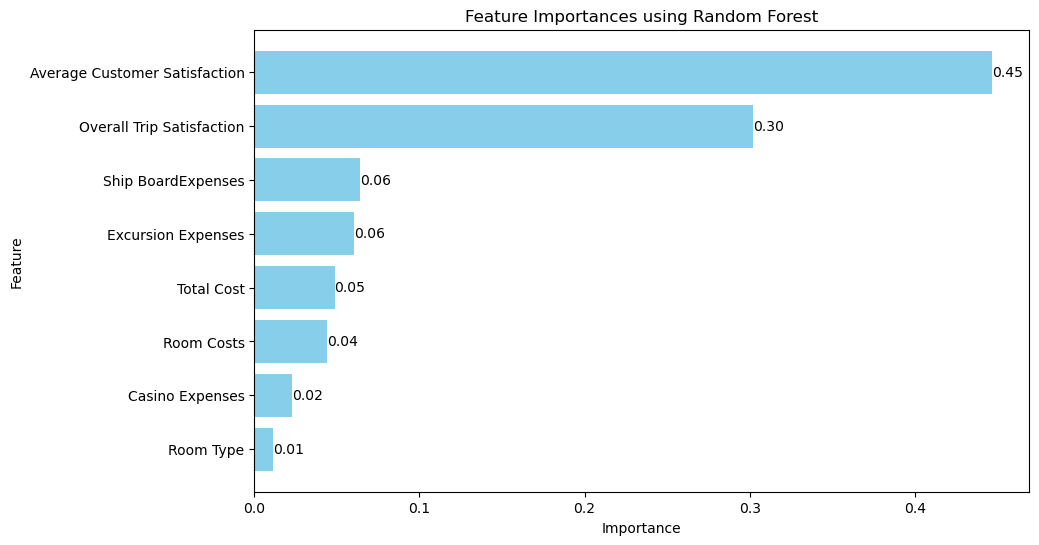

In [64]:
# Extracting feature names and importances
features = [feature[0] for feature in sorted_feature_importance]
importances = [feature[1] for feature in sorted_feature_importance]

# Plotting the horizontal bar chart with data labels
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances using Random Forest')

# Adding data labels to the bars
for index, value in enumerate(importances):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center')

plt.gca().invert_yaxis()  # Display in descending order
plt.show()


In [65]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV

# Initialize the Random Forest model
# rf = RandomForestClassifier()

# Define the parameter grid for Randomized Search
param_dist = {
    'n_estimators': np.arange(50, 301, 50),  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # Maximum depth of the tree
    'min_samples_split': np.arange(2, 11),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 11),  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Initialize RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf, 
                               param_distributions=param_dist, 
                               n_iter=100,  # Number of different combinations to try
                               cv=3,  # Cross-validation splitting strategy
                               verbose=2, 
                               random_state=42, 
                               n_jobs=-1)  # Use all available cores

# Fit the model
rf_random.fit(X_train_scaled, y_train)  # Ensure X_train_scaled and y_train are defined

# Get the best parameters and score
best_params = rf_random.best_params_
best_score = rf_random.best_score_

# Print the best parameters and score
print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score:.2f}')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': False}
Best Cross-Validation Score: 0.95


## Saving the base line model using Pickle
- In Python, the pickle module is used for serializing and deserializing objects. Serialization is the process of converting a Python object into a byte stream, and deserialization is the reverse process of reconstructing the Python object from the byte stream.

In [67]:
# Saving the Model
import pickle
pickle_out = open('classifier.pkl', mode = 'wb')
pickle.dump(rf, pickle_out)
pickle_out.close()